# Build & Evaluate Unsupervised Learning Models

In [8]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Load CSV data
wine_data = pd.read_csv("Data/WineQT.csv")

In [4]:
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [5]:
# Standardize the data (optional but recommended for PCA)
wine_data_scaled = (wine_data - wine_data.mean()) / wine_data.std()

# Perform PCA with target number of components to explain 80% variance
pca = PCA(n_components=0.8)  # Target 80% variance
pca_wine = pca.fit_transform(wine_data_scaled)

# How many components do we actually need?
explained_variance = pca.explained_variance_ratio_.sum()
print(f"PCA captured {explained_variance:.2f} variance in {pca.n_components_} components")

PCA captured 0.85 variance in 7 components


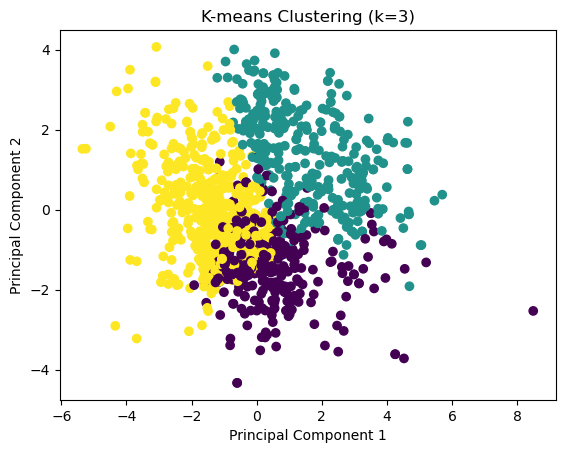

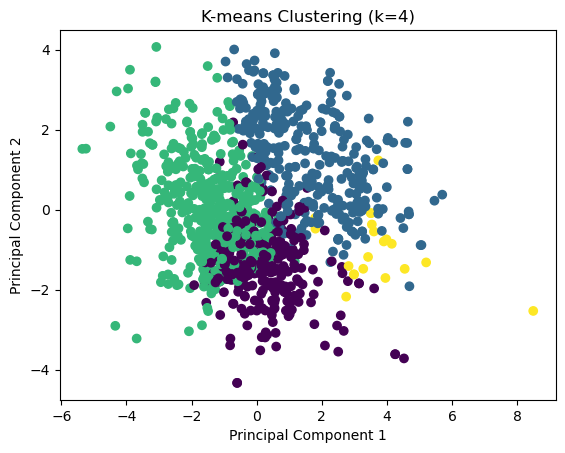

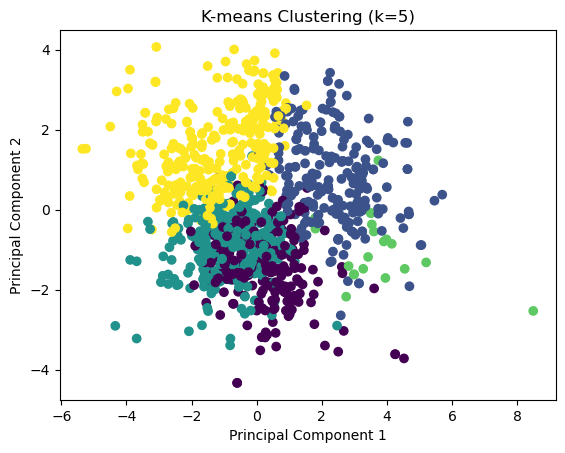

In [9]:
def kmeans_analysis(data, k):
    kmeans = KMeans(n_clusters=k, random_state=42)  # Set random state for reproducibility
    kmeans.fit(data)
    clusters = kmeans.labels_  # Use kmeans.labels_ after fitting

    # Plot using different colors for clusters
    plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap="viridis")
    plt.title(f"K-means Clustering (k={k})")
    plt.xlabel("Principal Component 1")  # Add axis labels for clarity
    plt.ylabel("Principal Component 2")
    plt.show()

# Try k=3, 4, and 5
kmeans_analysis(pca_wine, 3)
kmeans_analysis(pca_wine, 4)
kmeans_analysis(pca_wine, 5)

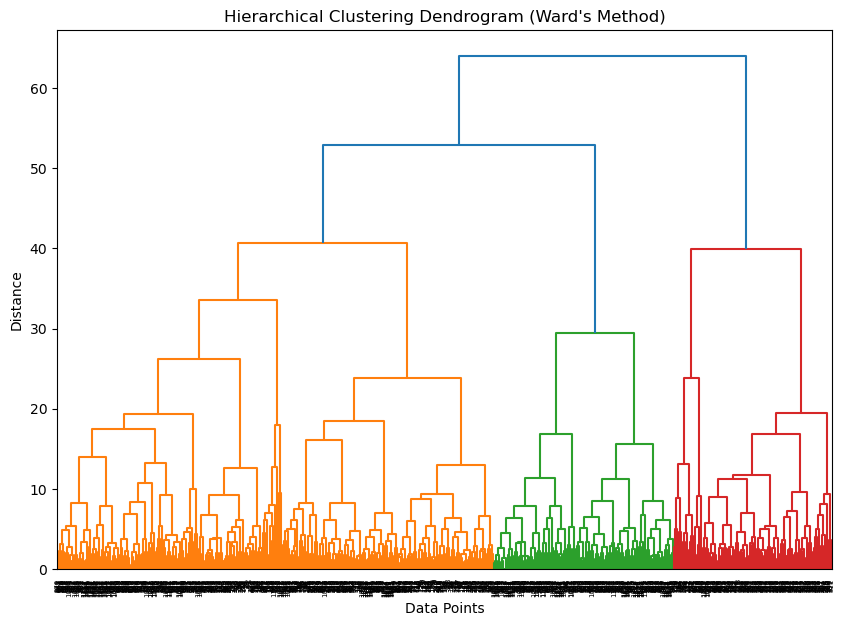

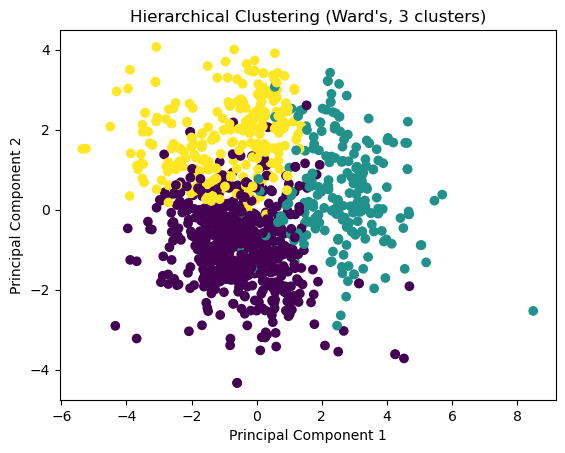

In [11]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage  # Import for dendrogram

# Perform hierarchical clustering with Ward's linkage
linked = linkage(pca_wine, 'ward')  # Use linkage function for Ward's method

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           labels=None,
           distance_sort='descending',
           show_leaf_counts=True) # Show the number of data points in each cluster
plt.title("Hierarchical Clustering Dendrogram (Ward's Method)")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()


# If you want a specific number of clusters:
n_clusters = 3  # Or choose a different number
hc = AgglomerativeClustering(n_clusters=n_clusters, linkage="ward")
clusters = hc.fit_predict(pca_wine) # Use fit_predict to get cluster labels

# Plot the clusters (similar to k-means plotting)
plt.scatter(pca_wine[:, 0], pca_wine[:, 1], c=clusters, cmap="viridis")
plt.title(f"Hierarchical Clustering (Ward's, {n_clusters} clusters)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()